In [1]:
from os.path import join
import numpy as np
from numpy.random import randn
from numpy.linalg import qr, svd, norm

import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.rcParams['font.size'] = 18

In [2]:
def rsvd(X, r, q, p):
    """
    Randomized SVD

    Parameters
    ----------
    X: (M, N) array_like
       matrix to factorize
    r: int
        target rank
    q: int
        number of power interations
    p: int
        oversampling

    Returns
    -------
    U: (M, K) array
        Unitary array

    S: (K,) array
        Vector of singular values sorted in descending order.

    VT: (K, N) array
         Unitary array.
    """
    # Step 1: Sample column space of X with random matrix P
    _, ny = X.shape
    P = randn(ny, r + p)
    Z = X @ P
    for _ in range(q):
        Z = X @ (X.T @ Z)

    Q, R = qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = svd(Y, full_matrices=False)
    U = Q @ UY

    return U, S, VT

In [3]:
# Read image and convert RGB -> gray
X = imread(join('..', 'DATA', 'jupiter.jpg')).mean(axis=-1)

# Deterministic SVD
U, S, VT = svd(X, full_matrices=False)
Σ = np.diag(S)

# Randomized SVD
# Target rank r
r = 400
rU, rS, rVT = rsvd(X, r, q=1, p=5)
rΣ = np.diag(rS)

In [4]:
## Reconstruction
XSVD = U[:, :r] @ Σ[:r, :r] @ VT[:r, :] # SVD approximation
errSVD = norm(X - XSVD, ord=2) / norm(X, ord=2)

XrSVD = rU[:, :r] @ rΣ[:r, :r] @ rVT[:r, :] # SVD approximation
errSVD = norm(X - XrSVD, ord=2) / norm(X, ord=2)

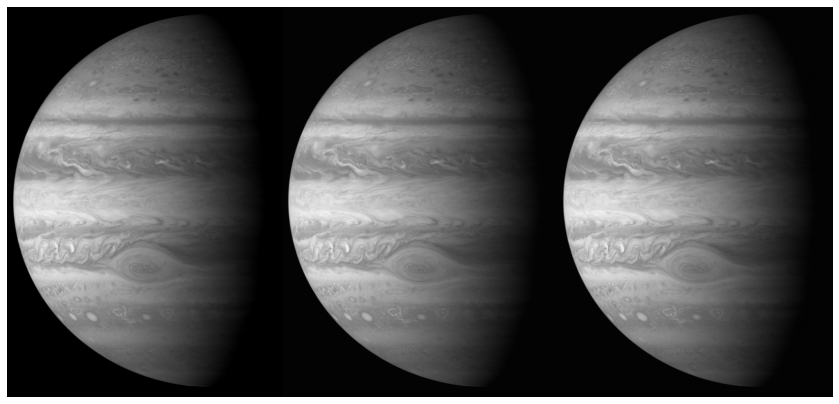

In [5]:
## Figure 1.28
fig, axs = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'wspace': 0})
for ax, im in zip(axs, [X, XSVD, XrSVD]):
    ax.imshow(im, cmap='gray')
    ax.axis(False)
plt.tight_layout()

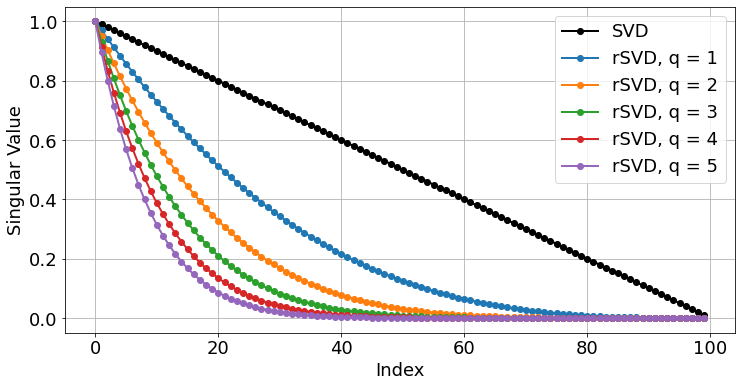

In [6]:
## Illustrate power iterations
X = randn(1000, 100)
U, S, VT = svd(X, full_matrices=False)
S = np.arange(1, 0, -0.01)
X = U @ np.diag(S) @ VT

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(S, 'o-', color='black', linewidth=2, label='SVD')

Y = X
for q in range(1, 6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = svd(Y, full_matrices=False)
    ax.plot(Sq, '-o', linewidth=2, label=f'rSVD, q = {q}')

    ax.set_xlabel('Index')
    ax.set_ylabel('Singular Value')
ax.grid(True)
ax.legend();